In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(IMAGE_SHAPE+(3,)))
])


In [3]:
# load flowers data
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8740218495_23858355d8_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/1273326361_b90ea56d0d_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16953818045_fea21c8bf8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4632251871_9f324a7bb5.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8681388520_c697dee897_n.jpg')]

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7502389724_85b4a6c855_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg')]

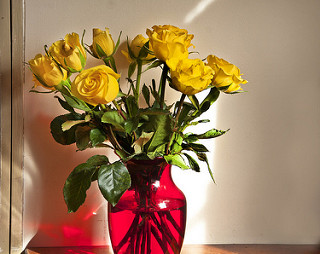

In [8]:
Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [12]:
img.shape

(250, 320, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

In [14]:
# train, test, split
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train = X_train / 255
y_test = y_test / 255

In [16]:
# retrain the model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [17]:
num_classes = 5

model = tf.keras.Sequential([
  pretrained_model, 
  keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)),
metrics=["accuracy"]

In [19]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 72s 739ms/step - loss: 0.8280
Epoch 2/10
92/92 [==============================] - 68s 744ms/step - loss: 0.4208
Epoch 3/10
92/92 [==============================] - 68s 739ms/step - loss: 0.3305
Epoch 4/10
92/92 [==============================] - 68s 734ms/step - loss: 0.2725
Epoch 5/10
92/92 [==============================] - 67s 729ms/step - loss: 0.2312
Epoch 6/10
92/92 [==============================] - 67s 729ms/step - loss: 0.2053
Epoch 7/10
92/92 [==============================] - 67s 730ms/step - loss: 0.1792
Epoch 8/10
92/92 [==============================] - 67s 731ms/step - loss: 0.1584
Epoch 9/10
92/92 [==============================] - 67s 729ms/step - loss: 0.1442
Epoch 10/10
92/92 [==============================] - 67s 733ms/step - loss: 0.1321


In [21]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 17s 730ms/step - loss: 2.2827


2.282733917236328